In [194]:
import keras
import pickle
import os
import cv2 as cv2
from sklearn import preprocessing
import numpy as np
from os import walk
import matplotlib.pyplot as plt
import shutil
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras import models
from keras import layers
from keras.applications import VGG16
from keras.models import load_model

In [195]:
base_model = load_model('All_VGG16_dataproaumentation.h5')
#All_VGG16_nrescale_aumentatation --> Sin efectos
#VGG_Dropout+Efectos--> Efectos con dropout
#All_VGG16_dataproaumentation --> efectos sin dropout

In [196]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('mypredictions').output)

In [197]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [198]:
#Seleccionamos la capa del modelo


In [199]:
#Creacion de una lista con los paths de las fotos - databse
count = 0
count2 = 0
lista_nom_database = []
lista_nom_queries = []
for root, dirs, files in os.walk("database/", topdown=False):
    for name in files:
        lista_nom_database.append(os.path.join(root, name))
        count = count + 1



In [201]:
#Pongo esto porque se me generan checkpoints aleatorios y necesito eliminarlos
lista_nom_database.pop(0)
lista_nom_database.pop(0)
lista_nom_database.pop(0)
lista_nom_database.pop(0)


'database/.ipynb_checkpoints/qneaqmthli-checkpoint.jpg'

In [204]:
#Creacion de una lista con los paths de las fotos - queries
for root, dirs, files2 in os.walk("queries/", topdown=False):
    for name2 in files2:
        lista_nom_queries.append(os.path.join(root, name2))
        count2 = count2 + 1

In [206]:
#Pongo esto porque se me generan checkpoints aleatorios y necesito eliminarlos
lista_nom_queries.pop(0)
lista_nom_queries.pop(0)
lista_nom_queries.pop(0)
lista_nom_queries.pop(0)

'queries/.ipynb_checkpoints/huvkiuohvm-checkpoint.jpg'

In [207]:
len(lista_nom_queries)

1673

In [208]:
len(lista_nom_database)

1671

In [211]:
lista_nom_queries.sort()

In [213]:
len(lista_nom_queries)

1673

In [214]:
lista_nom_database.sort()

In [216]:
len(lista_nom_database)

1671

In [217]:
#Cargamos las imagenes - database
photo_database = []
final = []

for i in range(len(lista_nom_database)):
    photo_database.append(image.load_img(lista_nom_database[i], target_size=(224, 224)))
    final.append(image.img_to_array(photo_database[i]))
    final[i] = np.expand_dims(final[i], axis=0)
    final[i] = preprocess_input(final[i])

In [219]:
#Usamos la lista Final y obtenemos el vector salida con los descriptores de las imagenes de val
salida_database = []
k = 0
for k in range(len(lista_nom_database)):
    salida_database.append(model.predict(final[k]))

In [220]:
#Cargamos las imagenes - queries
photo_queries = []

for i in range(1671):
    photo_queries.append(image.load_img(lista_nom_queries[i], target_size=(224, 224)))



In [221]:
i2=0
imagen2 = []
final2 = []
for i2 in range(len(lista_nom_queries)):   
    photo_queries.append(image.load_img(lista_nom_queries[i2], target_size=(224, 224)))# Aquí se efectua la lectura de todas las imagenes
    final2.append(image.img_to_array(photo_queries[i2]))
    final2[i2] = np.expand_dims(final2[i2], axis=0)
    final2[i2] = preprocess_input(final2[i2])

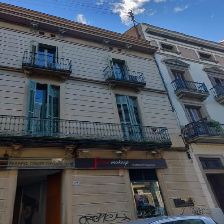

In [222]:
photo_queries[0]

In [223]:
salida_queries = []
k2 = 0
for k2 in range(len(lista_nom_queries)):
    salida_queries.append(model.predict(final2[k2]))

In [224]:
descriptor_database = np.asarray(salida_database)

In [225]:
descriptor_database.shape

(1671, 1, 13)

In [226]:
descriptor_queries = np.asarray(salida_queries)

In [227]:
pickle.dump(descriptor_database, open("mypredictions_database_nrescaled_aumentation_dataproaumentation.p", "wb")) 

In [228]:
pickle.dump(descriptor_queries, open("mypredictions_queries_nrescaled_aumentation_dataproaumentation.p", "wb"))

In [229]:
#pickle.dump(photo_database, open("photo_database_DENS.p", "wb"))

In [230]:
#pickle.dump(photo_queries, open("photo_queries_DENS.p", "wb"))

In [231]:
#Segunda parte

In [232]:
descriptor_database.shape

(1671, 1, 13)

In [233]:
descriptor_queries.shape

(1673, 1, 13)

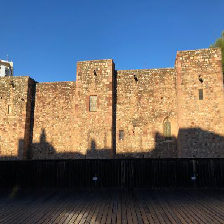

In [236]:
photo_database[7]

In [238]:
descriptors_db=np.reshape(descriptor_database,(1671,13))

In [239]:
descriptors_qr=np.reshape(descriptor_queries,(1673,13))

In [241]:
import sklearn.preprocessing

x_db_normalized = sklearn.preprocessing.normalize(descriptors_db, norm='l2', axis=1, copy=True, return_norm=False)

In [242]:
x_qr_normalized = sklearn.preprocessing.normalize(descriptors_qr, norm='l2', axis=1, copy=True, return_norm=False)

In [243]:
x_db_normalized= x_db_normalized.transpose()

In [244]:
Last = np.matmul(x_qr_normalized,x_db_normalized,out = None)

In [245]:
ranks = np.argsort(Last,axis = 1)[:,::-1]

In [246]:
ranks.shape

(1673, 1671)

In [250]:
x_db_images = []
for ol in range(1671):   
    
    x_db_images.append(np.array(photo_database[ol]))
    

In [251]:
x_qr_images = []

for oil in range(1673):   
    
    x_qr_images.append(np.array(photo_queries[oil]))

In [252]:
from PIL import Image, ImageOps;
# get the original images for visualization
# x_test_normalized = np.empty((717,4096))
h,w = (224, 224)
new_image= Image.new('RGB', (h*20,w*40))

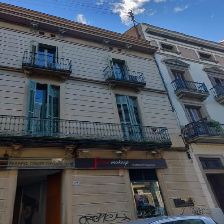

In [253]:
photo_queries[0]

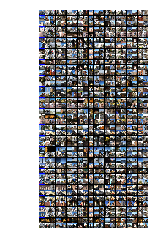

In [254]:
# Visualize ranks of the 10 queries
count=0
k=19
offset = 30 # it will show results from query #'offset' to #offset+10
for q in range(40):
    ranks_q = []
    ranks_q = ranks[q*(offset+1),:] #Aquí ranks, te coge los que más se parezcan en orden
    #for long in range(k):#Aquí miro los K primeras // ranks_q.size
    for i in range(k):
            new_image.paste(ImageOps.expand(Image.fromarray(x_db_images[ranks_q[i]])
                                            ,border=20,fill='black'), (h*(1+i),w*q ))

    #visualize query
    ima_q = Image.fromarray(x_qr_images[q*(offset+1)])
    ima_q = ImageOps.expand(ima_q, border=20, fill='blue')
    new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()

In [255]:
new_image.save('last_of_all3.jpg')

In [57]:
s = (1673,1671)
final = np.zeros(s)

for q in range(len(x_qr_images)):
    ranks_q = []
    ranks_q = ranks[q,:] 
    final[q] = ranks_q


In [58]:
final_qr = range(len(x_qr_images))
final_qr = np.asarray(final_qr)


In [59]:
final_qr = np.transpose([final_qr])

In [60]:
final_qr

array([[   0],
       [   1],
       [   2],
       ...,
       [1670],
       [1671],
       [1672]])

In [61]:
ff = (1673,1672)
ff = np.zeros(s)
ff = np.concatenate((final_qr,final),axis=1)

In [62]:
maximo = ff[0][2]
for i in range(len(ff)):
    
    if ff[i][2] > maximo:
        maximo = ff[i][1671]

print(maximo)

1628.0


In [65]:
real_database_academy =  {}
real_query_academy =  {}
k=0
for k in range(len(lista_nom_database)):
    
    if not real_database_academy.get(k):
        real_database_academy[k] = lista_nom_database[k][9:len(lista_nom_database[k])-4]

k=0

for k in range(len(lista_nom_queries)):
    if not real_query_academy.get(k):
        real_query_academy[k] = lista_nom_queries[k][8:len(lista_nom_queries[k])-4]



In [66]:
h ,w= 1673,2;
Matrix = [[0 for x in range(w)] for y in range(h)]

for o in range (1673):
    Matrix[o][0] = real_query_academy[ff[o][0]]
    
    
for q in range(1673):
    ranks_q = ranks[q,:]
    
    for i in range(1671):
        if i == 0:
            name = real_database_academy[ranks_q[i]]
        if i == 1671:
            name = name +'\n'
        else:
            name = name + ' ' + real_database_academy[ranks_q[i]]

    Matrix[q][1] = name
#for l in range(1673):

#    for op in range(1671):
        
#        Matrix[l][op+1] = real_database_academy[ff[l][op+1]]
#
#

In [67]:
import csv
row1 = ["Query","RetrievedDocuments"]
with open("kaggle_fineturring_VGG_test6_fc2+efectos.csv", 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(row1)
    for z in range(1673):
            wr.writerow(Matrix[z])